<a href="https://colab.research.google.com/github/amit5570/Android/blob/master/Copy_of_TYCS_599_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRACTICAL:1
 
A) IMPLEMENT BREATH FIRST SEARCH

In [ ]:
 graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}
 
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))
print("Amit_599")
list(dfs_paths(graph, 'A', 'F'))

Amit_599


[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

B) IMPLEMENT DEPTH FIRST SEARCH

In [ ]:
 graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}
 
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))
print("Amit_599")
list(dfs_paths(graph, 'A', 'F'))

Amit_599


[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

C) Iterative Deepening DFS Search

In [ ]:
 graph_demo = {
    '0': ['1'],
    '1': ['0', '2'],
    '2': ['3', '5', '7', '8'],
    '3': ['9', '10'],
    '5':['2', '6', '7', '8'],
    '6':['5'],
    '7':['2','5', '8'],
    '8':['2','5', '7'],
    '9':['3'],
    '10':['3'],  
}
 
 
def DLS(source,depth):
    start=graph_demo[source]
    print(source, end=' ')
    if start[0] is None:
        return
    if depth==0:
        return
    else:
        for location in start:
            listt = location
            for place in listt:
                DLS(place,depth-1)
 
def iddfs(source,max_height):
    for i in range(max_height+1):
        print('depth: '+str(i)+': ',end=' ')
        DLS(source,i)
        print()
 
iddfs('0',4)
print('Amit_599')

depth: 0:  0 
depth: 1:  0 1 
depth: 2:  0 1 0 2 
depth: 3:  0 1 0 1 2 3 5 7 8 
depth: 4:  0 1 0 1 0 2 2 3 9 1 0 5 2 6 7 8 7 2 5 8 8 2 5 7 
Amit_599


 PRACTICAL NO:- 2
A) Implement A* Search Algorithm

In [ ]:
 from collections import deque
 
class Graph:
   
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list
 
    def get_neighbors(self, v):
        return self.adjacency_list[v]
 
    # heuristic function with equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }
 
        return H[n]
 
    def a_star_algorithm(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])
        g = {}
 
        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node
 
        while len(open_list) > 0:
            n = None
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;
 
            if n == None:
                print('Path does not exist!')
                return None
            if n == stop_node:
                reconst_path = []
 
                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]
 
                reconst_path.append(start_node)
 
                reconst_path.reverse()
 
                print('Path found: {}'.format(reconst_path))
                return reconst_path
            for (m, weight) in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n
                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)
            open_list.remove(n)
            closed_list.add(n)
        print('Path does not exist!')
        return None
adjacency_list = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}
graph1 = Graph(adjacency_list)
graph1.a_star_algorithm('A', 'D')
print('Amit_599')

Path found: ['A', 'B', 'D']
Amit_599


 B) Implement recursive best-first search algorithm

In [ ]:
 class Graph:
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()
    def make_undirected(self):
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.graph_dict.setdefault(b, {})[a] = dist
    def connect(self, A, B, distance=1):
        self.graph_dict.setdefault(A, {})[B] = distance
        if not self.directed:
            self.graph_dict.setdefault(B, {})[A] = distance
    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)
    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)
class Node:
    def __init__(self, name:str, parent:str):
        self.name = name
        self.parent = parent
        self.g = 0 
        self.h = 0 
    def __eq__(self, other):
        return self.name == other.name
    def __lt__(self, other):
         return self.f < other.f
    def __repr__(self):
        return ('({0},{1})'.format(self.position, self.f))
def best_first_search(graph, heuristics, start, end):
    open = []
    closed = []
    start_node = Node(start, None)
    goal_node = Node(end, None)
    open.append(start_node)
    while len(open) > 0:
        open.sort()
        current_node = open.pop(0)
        closed.append(current_node)
        if current_node == goal_node:
            path = []
            while current_node != start_node:
                path.append(current_node.name + ': ' + str(current_node.g))
                current_node = current_node.parent
            path.append(start_node.name + ': ' + str(start_node.g))
            return path[::-1]
        neighbors = graph.get(current_node.name)
        for key, value in neighbors.items():
            neighbor = Node(key, current_node)
            if(neighbor in closed):
                continue
            # Calculate cost to goal
            neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
            neighbor.h = heuristics.get(neighbor.name)
            neighbor.f = neighbor.h
            # Check if neighbor is in open list and if it has a lower f value
            if(add_to_open(open, neighbor) == True):
                # Everything is green, add neighbor to open list
                open.append(neighbor)
    # Return None, no path is found
    return None
# Check if a neighbor should be added to open list
def add_to_open(open, neighbor):
    for node in open:
        if (neighbor == node and neighbor.f >= node.f):
            return False
    return True
# The main entry point for this module
def main():
    # Create a graph
    graph = Graph()
    # Create graph connections (Actual distance)
    graph.connect('Frankfurt', 'Wurzburg', 111)
    graph.connect('Frankfurt', 'Mannheim', 85)
    graph.connect('Wurzburg', 'Nurnberg', 104)
    graph.connect('Wurzburg', 'Stuttgart', 140)
    graph.connect('Wurzburg', 'Ulm', 183)
    graph.connect('Mannheim', 'Nurnberg', 230)
    graph.connect('Mannheim', 'Karlsruhe', 67)
    graph.connect('Karlsruhe', 'Basel', 191)
    graph.connect('Karlsruhe', 'Stuttgart', 64)
    graph.connect('Nurnberg', 'Ulm', 171)
    graph.connect('Nurnberg', 'Munchen', 170)
    graph.connect('Nurnberg', 'Passau', 220)
    graph.connect('Stuttgart', 'Ulm', 107)
    graph.connect('Basel', 'Bern', 91)
    graph.connect('Basel', 'Zurich', 85)
    graph.connect('Bern', 'Zurich', 120)
    graph.connect('Zurich', 'Memmingen', 184)
    graph.connect('Memmingen', 'Ulm', 55)
    graph.connect('Memmingen', 'Munchen', 115)
    graph.connect('Munchen', 'Ulm', 123)
    graph.connect('Munchen', 'Passau', 189)
    graph.connect('Munchen', 'Rosenheim', 59)
    graph.connect('Rosenheim', 'Salzburg', 81)
    graph.connect('Passau', 'Linz', 102)
    graph.connect('Salzburg', 'Linz', 126)
    # Make graph undirected, create symmetric connections
    graph.make_undirected()
    # Create heuristics (straight-line distance, air-travel distance)
    heuristics = {}
    heuristics['Basel'] = 204
    heuristics['Bern'] = 247
    heuristics['Frankfurt'] = 215
    heuristics['Karlsruhe'] = 137
    heuristics['Linz'] = 318
    heuristics['Mannheim'] = 164
    heuristics['Munchen'] = 120
    heuristics['Memmingen'] = 47
    heuristics['Nurnberg'] = 132
    heuristics['Passau'] = 257
    heuristics['Rosenheim'] = 168
    heuristics['Stuttgart'] = 75
    heuristics['Salzburg'] = 236
    heuristics['Wurzburg'] = 153
    heuristics['Zurich'] = 157
    heuristics['Ulm'] = 0
    # Run search algorithm
    path = best_first_search(graph, heuristics, 'Frankfurt', 'Munchen')
    print(path)
    print()
 
# Tell python to run main method
if __name__ == "__main__": main()
print('Amit_599')

['Frankfurt: 0', 'Wurzburg: 111', 'Ulm: 294', 'Munchen: 417']

Amit_599


 PRACTICAL NO:-5 PERFORMING AND and OR OPERATION

In [ ]:
 import numpy as np
def unitStep(v):
    if v>= 0:
        return 1
    else:
        return 0
def perceptronModel(x,w,b):
    v=np.dot(w,x)+b
    y=unitStep(v)
    return y
def AND_logicFunction(x):
    w=np.array([1,1])
    b=-1.5
    return perceptronModel(x,w,b)
def OR_logicFunction(x):
    w=np.array([1,1])
    b=-0.5
    return perceptronModel(x,w,b)
 
    
test1=np.array([0,0])
test2=np.array([0,1])
test3 = np.array([1,0])
test4 = np.array([1,1])
 
print("AND logicfunction")
print("AND({},{})={}".format(0,0,AND_logicFunction(test1)))
print("AND({},{})={}".format(0,1,AND_logicFunction(test2)))
print("AND({},{})={}".format(1,0,AND_logicFunction(test3)))
print("AND({},{})={}".format(1,1,AND_logicFunction(test4)))
 
print("OR logicfunction")
print("OR({},{})={}".format(0,0,OR_logicFunction(test1)))
print("OR({},{})={}".format(0,1,OR_logicFunction(test2)))
print("OR({},{})={}".format(1,0,OR_logicFunction(test3)))
print("OR({},{})={}".format(1,1,OR_logicFunction(test4)))
 
print("=====")
print('Amit_599')

AND logicfunction
AND(0,0)=0
AND(0,1)=0
AND(1,0)=0
AND(1,1)=1
OR logicfunction
OR(0,0)=0
OR(0,1)=1
OR(1,0)=1
OR(1,1)=1
=====
Amit_599


 PRACTICAL NO:- 6CAT vs NonCat

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline
 
def load_dataset():
    train_dataset = h5py.File('/content/train_catvnoncat (1).h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
 
    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
 
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
 
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
 
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
 
 
# Loading the data (non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
index = 26
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  " picture")
print("------")
print("Amit_599")

In [ ]:
 # Loading the data (cat)
train_set_y_orig, train_set_x, test_set_y_orig, test_set_x, classes = load_dataset()
index = 27
plt.imshow(train_set_y_orig[index])
print ("y = " + str(train_set_y[:,

 PRACTICAL NO:- 8Linear Regression

In [ ]:
 import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
 x_and_y = [(0,1),(1,3),(2,2),(3,5),(4,7),(5,8),(6,8),(7,9),(8,10),(9,12)]
data = pd.DataFrame(x_and_y, columns=['X','y'])
data

,X,y
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


1.525
-----
Amit_599


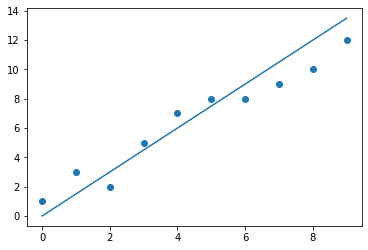

In [ ]:
 X = data['X']
y = data['y']
b = 0
w = 1.5
y_predicted = b + w * X
error = y - y_predicted
print(np.mean(error**2))
plt.scatter(X,y)
plt.plot(X, y_predicted)
print("-----")
print("Amit_599")

 PRACTICAL NO:- 9IMPLEMENT SUPPORT VECTOR ALGORITHM

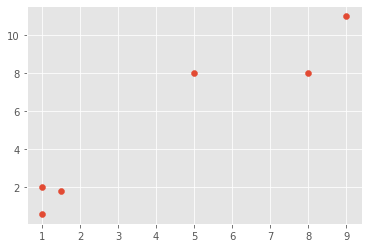

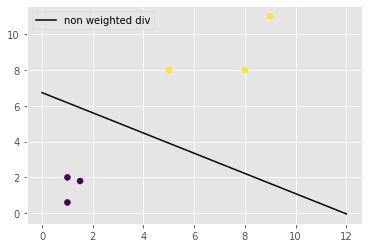

-----
Amit_599


In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
x= [1,5,1.5,8,1,9]
y= [2,8,1.8,8,0.6,11]
plt.scatter(x,y)
plt.show()
X= np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
y=np.array([0,1,0,1,0,1])
clf = svm.SVC(kernel='linear', C =1.0)
clf.fit(X,y)
w= clf.coef_[0]
a= -w[0]/w[1]
xx = np.linspace(0,12)
yy = a* xx -  clf.intercept_[0]/w[1]
h0 = plt.plot(xx,yy,'k-',label="non weighted div")
plt.scatter(X[:,0],X[:,1],c=y)
plt.legend()
plt.show()
print("-----")
print("Amit_599")

 PRACTICAL NO:- 10
DECISION TREE

Following are the columns of iris dataset

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 column

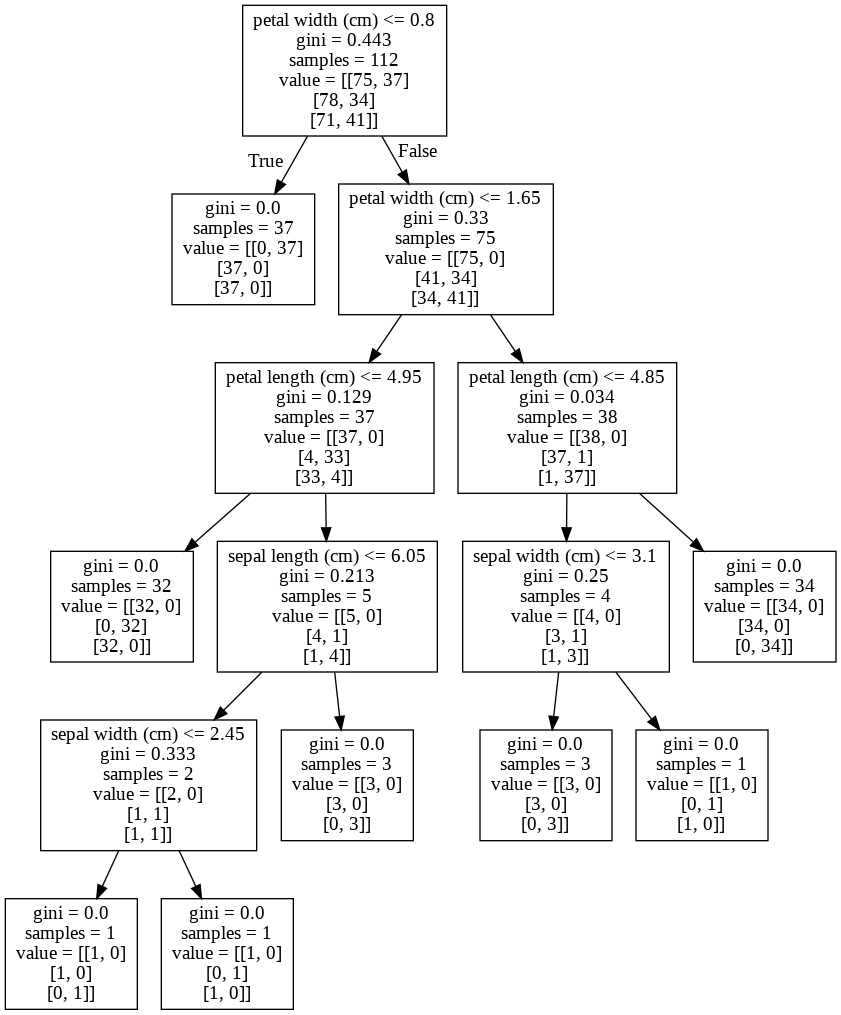

In [ ]:
 from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
 
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
print("Following are the columns of iris dataset\n")
print(X)
print("-----")
print("Amit_599")
y = pd.Categorical.from_codes(iris.target, iris.target_names)
 
X.head()
y = pd.get_dummies(y)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())